In [31]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import math
import numpy as np
import seaborn as sns
import random

import seaborn as sns
sns.set()

In [32]:
n = 105

In [33]:
numberList = [0,1,2,3]
x = random.choices(numberList, weights=(0.733, 0.105, 0.095, 0.067), k=1)

def dt(x):
    a = x[0]
    if a == 0:
        b = random.randint(30, 50)
    elif a == 1:
        b = random.randint(50, 70)
    elif a == 2:
        b = random.randint(70, 90)
    elif a == 3:
        b = random.randint(90, 110)
    
    return b


#make array of daily travel distance

dtravel =  np.zeros(n)
for i in range(len(dtravel)):
    x = random.choices(numberList, weights=(0.733, 0.105, 0.095, 0.067), k=1)
    dtravel[i] = dt(x)

    
#Make array of range values
ranged =  np.full(n , 137.5)

#soc
soc = 1 - dtravel/ranged

#battery capacity
bc =  np.zeros(n)
numList = [25,16.5,26.5]
for i in range(len(bc)):
    x = random.choices(numList, weights=(0.333, 0.333, 0.333), k=1)
    bc[i] = x[0]

    
#Make array of power level
pl =  np.full(n , 2.4)



# Daily Travel PDF

Mean of Daily Travel:  51.98095238095238
STD of Daily Travel:  22.139807265638904


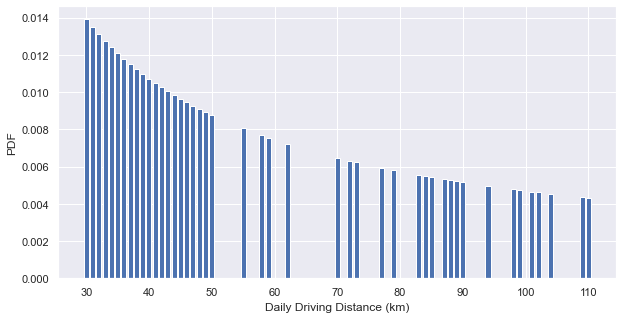

In [34]:
def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out = 1/(x*std * np.sqrt(2 * np.pi)) * np.exp( - (np.log(x) - mean)**2 / (2 * std**2))
    return y_out

print('Mean of Daily Travel: ',np.mean(dtravel))

print('STD of Daily Travel: ',np.std(dtravel))

y = pdf(dtravel)

dtravel_pdf = (y/(np.sum((y/(np.linalg.norm(y))))*np.linalg.norm(y)))

d = {"Travel": dtravel, "PDF": dtravel_pdf}
df3 = pd.DataFrame(d)
#df3.set_index('Travel', inplace=True)

#df = df3.groupby('Travel')['PDF'].sum()
#df3.to_csv('travel2.csv')
#df.reset_index(inplace=True)

#df = pd.DataFrame(df)
#df.reset_index(inplace=True)

#sns.kdeplot(df['Travel'], df['PDF'])
plt.figure(figsize=(10, 5))
plt.bar(df3['Travel'], df3['PDF'])
#df3.plot(kind='hist')

#sns.barplot(data=df, x="Travel", y="PDF", color='blue')
plt.xlabel('Daily Driving Distance (km)')
plt.ylabel('PDF')

plt.locator_params(axis="x", nbins=10)

plt.show()

# SOC PDF

Mean of SOC:  0.6219567099567099
STD of SOC:  0.1610167801137375


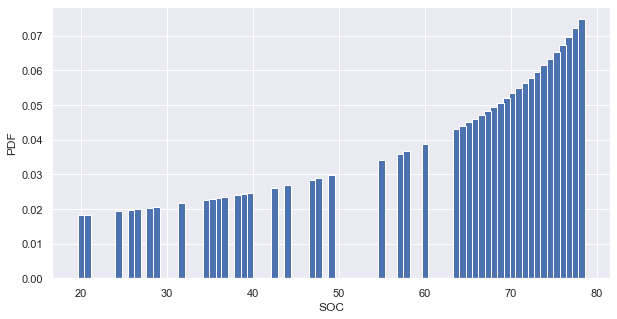

In [35]:
mean_s = np.mean(soc)
print('Mean of SOC: ',mean_s)

std_s = np.std(soc)
print('STD of SOC: ',std_s)

u2pi = math.sqrt(2*math.pi)

soc_pdf = 1/(std_s*ranged*(1-soc)*u2pi)*np.exp(- (np.square(np.log(ranged*(1-soc))-mean_s))/2*std_s*std_s)

n_soc_pdf = (soc_pdf/(np.sum((soc_pdf/(np.linalg.norm(soc_pdf))))*np.linalg.norm(soc_pdf)))


#sns.kdeplot(soc_pdf)

d = {"SOC": soc*100, "PDF": soc_pdf}
df3 = pd.DataFrame(d)

df = df3.groupby('SOC')['PDF'].sum()
#df3.to_csv('travel2.csv')
#df.reset_index(inplace=True)
df = pd.DataFrame(df)
df.reset_index(inplace=True)

plt.figure(figsize=(10, 5))
plt.bar(df3['SOC'], df3['PDF'])
#df.plot(kind='bar')

plt.xlabel('SOC')
plt.ylabel('PDF')


plt.locator_params(axis="x", nbins=10)

plt.show()

In [36]:
all_stats = []
num_reps = n
num_simulations = 1000



# Loop through simulations
for i in range(num_simulations):

    #randomly sampling soc and calculating charging time
    ct = (bc*(1-np.random.choice(soc, num_reps, p=n_soc_pdf))/(0.8*pl))*60
    
    
    df2 = pd.DataFrame(index=range(num_reps), data={'Charging Time': ct})

df2

,Charging Time
0,271.022727
1,330.000000
2,153.750000
3,161.250000
4,283.068182
...,...
100,153.750000
101,215.909091
102,283.068182
103,240.909091


In [37]:
d = {"Daily Travel": dtravel, "Load":pl}
df = pd.DataFrame(d)

df = df.join(df2)
df.head()

,Daily Travel,Load,Charging Time
0,37.0,2.4,271.022727
1,43.0,2.4,330.000000
2,83.0,2.4,153.750000
3,84.0,2.4,161.250000
4,50.0,2.4,283.068182


In [38]:
numberList = [0,1,2,3]
x = random.choices(numberList, weights=(0.25, 0.25, 0.25, 0.25), k=1)

def slot1(x):

    import datetime
    import time
    import random
    
    if x[0] == 0:
        a = 0
    elif x[0] == 1:
        a = 6
    elif x[0] == 2:
        a = 12
    elif x[0] == 3:
        a = 18

        
    b = a + 5
    MINTIME = datetime.datetime(2022,3,1,a,0,0)
    MAXTIME = datetime.datetime(2022,3,1,b,55,0)

    mintime_ts = int(time.mktime(MINTIME.timetuple())) #convert date into int
    maxtime_ts = int(time.mktime(MAXTIME.timetuple())) #convert date into int



    nb_slots = (maxtime_ts - mintime_ts)//(5*60)  # number of 5 minutes slots
    random_slot = random.randint(0, nb_slots)
    random_ts = mintime_ts + 5*60 * random_slot
    RANDOMTIME = datetime.datetime.fromtimestamp(random_ts)
    return datetime.datetime.strftime(RANDOMTIME, '%H:%M')

#print(slot1(x))

times =  np.empty((len(df),), dtype=datetime)
for i in range(len(times)):
    x = random.choices(numberList, weights=(0.25, 0.25, 0.25, 0.25), k=1)
    times[i] = slot1(x)

In [39]:
df3 = pd.DataFrame(data =times,columns=['Charge Time Start'])
df = df.join(df3)
df.head()

df['Charge Time Start']= pd.to_datetime(df['Charge Time Start'])

df.sort_values('Charge Time Start', inplace=True,ignore_index=True)

df.head()

,Daily Travel,Load,Charging Time,Charge Time Start
0,31.0,2.4,330.000000,2022-06-27 00:00:00
1,33.0,2.4,157.500000,2022-06-27 00:05:00
2,34.0,2.4,240.909091,2022-06-27 00:15:00
3,47.0,2.4,142.500000,2022-06-27 00:15:00
4,62.0,2.4,204.772727,2022-06-27 00:15:00


In [40]:
import datetime 

start = datetime.datetime(2022, 6, 27)
dt_array = np.array([start + datetime.timedelta(minutes=i) for i in range(1440)])
print(dt_array)

vals = np.zeros(len(dt_array))
#vals

[datetime.datetime(2022, 6, 27, 0, 0) datetime.datetime(2022, 6, 27, 0, 1)
 datetime.datetime(2022, 6, 27, 0, 2) ...
 datetime.datetime(2022, 6, 27, 23, 57)
 datetime.datetime(2022, 6, 27, 23, 58)
 datetime.datetime(2022, 6, 27, 23, 59)]


In [41]:
c= 0

for i in range(len(df)):
    result = np. where(dt_array == df.loc[i, "Charge Time Start"])
    b = result[0][0]
    for c in range(int(df.loc[i, "Charging Time"])):
        if b != 1440:
            vals[b] = vals[b] + df.loc[i, "Load"]
            b = b + 1
        else:
            break
        

In [42]:
for i in range(len(dt_array)):
    dt_array[i] = "{:%H:%M}".format(dt_array[i])
#print(dt)
print(dt_array)

['00:00' '00:01' '00:02' ... '23:57' '23:58' '23:59']


In [61]:
d = {"Time": dt_array, "Load Profile": vals}
df3 = pd.DataFrame(d)

df3.to_csv('finalprofile_'+str(n)+'.csv')

df3.head()


,Time,Load Profile
0,00:00,2.4
1,00:01,2.4
2,00:02,2.4
3,00:03,2.4
4,00:04,2.4


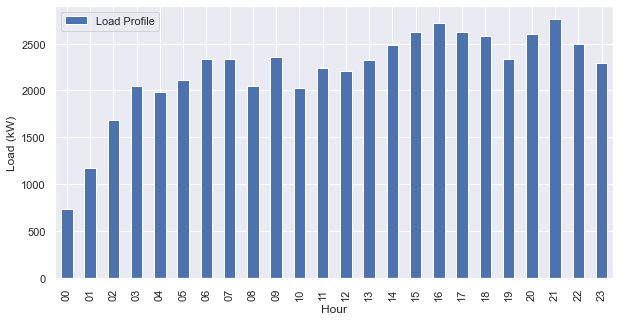

In [56]:
df3['hour'] = df3['Time'].map(lambda x: x[:2])


hourly = df3.groupby('hour')['Load Profile'].sum()

hourly = pd.DataFrame(hourly)
#print(hourly)

#plt.bar(hourly['hour'], hourly['Load Profile'])
hourly.plot(kind='bar', figsize=(10, 5))

plt.xlabel('Hour')
plt.ylabel('Load (kW)')


#plt.figure(figsize=(15, 5))
#plt.locator_params(axis="x", nbins=10)

plt.show()

hourly.to_csv('hourly_finalprofile_'+str(n)+'.csv')